In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.feature_selection import SelectKBest, f_regression
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv('used_car_prices_dataset_final.csv')

In [3]:
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


In [57]:
data.dtypes

CarAge                    float64
Mileage                   float64
OwnerCount                float64
EngineSize                float64
Horsepower                float64
CarCondition              float64
ResalePrice               float64
Brand_Audi                float64
Brand_BMW                 float64
Brand_Ford                float64
Brand_Honda               float64
Brand_Hyundai             float64
Brand_Kia                 float64
Brand_Mercedes            float64
Brand_Nissan              float64
Brand_Toyota              float64
FuelType_Diesel           float64
FuelType_Electric         float64
FuelType_Hybrid           float64
FuelType_Petrol           float64
Transmission_Automatic    float64
Transmission_Manual       float64
dtype: object

In [4]:
data.isnull().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [58]:
data.shape

(4666, 22)

In [5]:
num_col = data.select_dtypes(include='number').columns

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CarAge                  4666 non-null   float64
 1   Mileage                 4666 non-null   float64
 2   OwnerCount              4666 non-null   float64
 3   EngineSize              4666 non-null   float64
 4   Horsepower              4666 non-null   float64
 5   CarCondition            4666 non-null   float64
 6   ResalePrice             4666 non-null   float64
 7   Brand_Audi              4666 non-null   float64
 8   Brand_BMW               4666 non-null   float64
 9   Brand_Ford              4666 non-null   float64
 10  Brand_Honda             4666 non-null   float64
 11  Brand_Hyundai           4666 non-null   float64
 12  Brand_Kia               4666 non-null   float64
 13  Brand_Mercedes          4666 non-null   float64
 14  Brand_Nissan            4666 non-null   

In [60]:
data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Automatic,Transmission_Manual
count,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,...,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00,4666.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,52181.77,-0.00,-0.00,-0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,12106.95,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.56,-3.23,-1.26,-3.94,-4.46,-1.33,-599.85,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,-0.60,-0.57,-0.58,-0.56,-0.99,-1.01
25%,-0.89,-0.62,-1.26,-0.64,-0.67,-1.33,44039.24,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,-0.60,-0.57,-0.58,-0.56,-0.99,-1.01
50%,-0.05,-0.06,-0.38,-0.03,-0.01,0.45,52222.64,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,-0.60,-0.57,-0.58,-0.56,-0.99,0.99
75%,0.80,0.53,0.49,0.56,0.67,0.45,60278.03,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,1.68,-0.57,1.72,-0.56,1.01,0.99
max,3.32,4.07,1.36,5.12,3.55,1.35,94400.29,2.84,2.80,2.76,...,2.82,2.83,2.92,2.80,1.68,1.75,1.72,1.78,1.01,0.99


In [61]:
# Row Duplication
data.duplicated().sum()

0

In [6]:
num_col

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'ResalePrice'],
      dtype='object')

CarAge


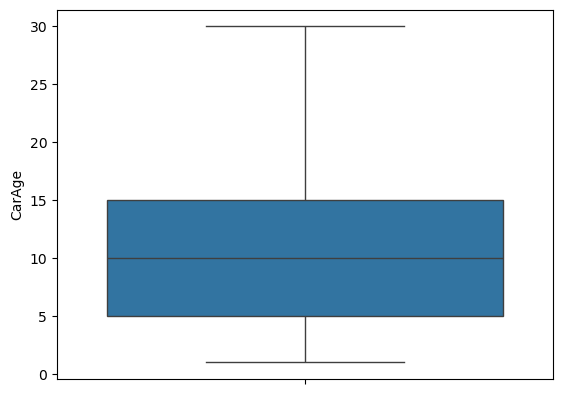

Mileage


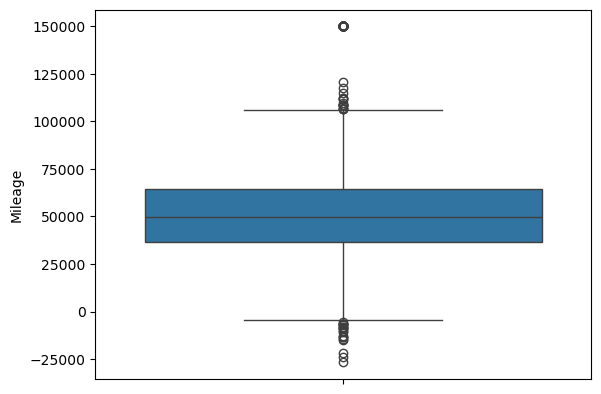

OwnerCount


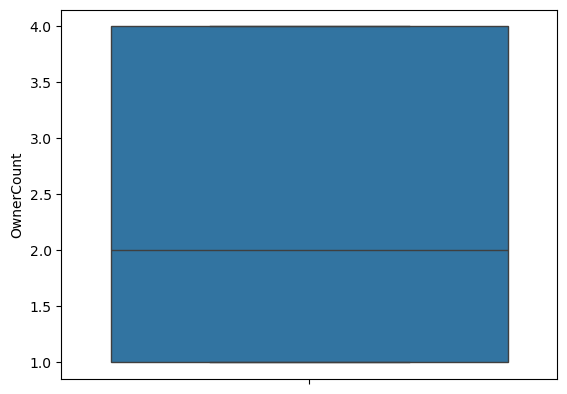

EngineSize


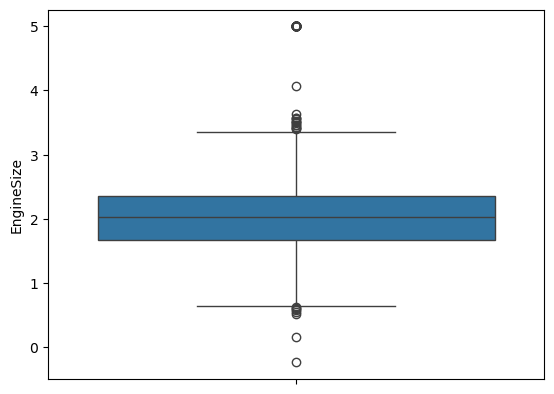

Horsepower


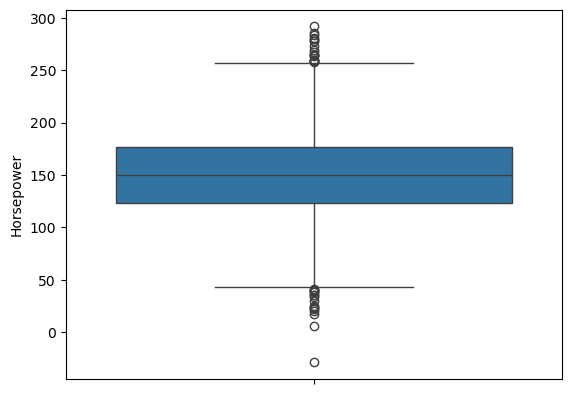

ResalePrice


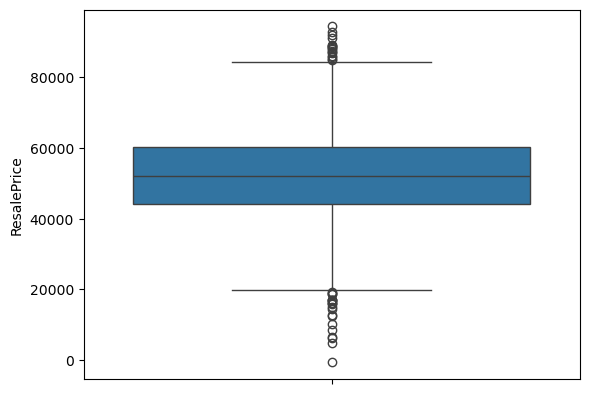

In [7]:
for col in num_col:
    print(col)
    sns.boxplot(data[col])
    plt.show()

<Axes: >

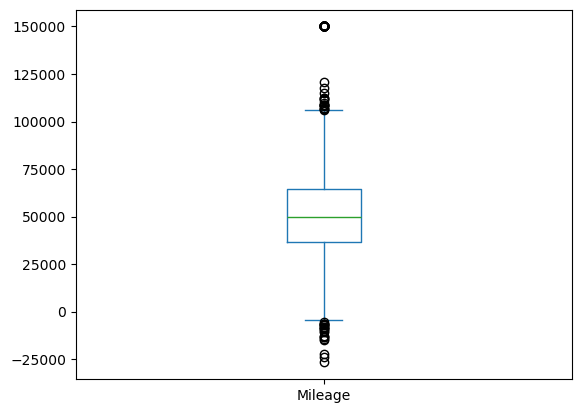

In [8]:
data['Mileage'].plot(kind = 'box')

In [9]:
data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.06,0.03,0.03,0.01,-0.48
Mileage,0.06,1.00,0.01,0.06,-0.00,-0.21
OwnerCount,0.03,0.01,1.00,-0.01,0.02,0.01
EngineSize,0.03,0.06,-0.01,1.00,-0.01,0.20
Horsepower,0.01,-0.00,0.02,-0.01,1.00,0.65
ResalePrice,-0.48,-0.21,0.01,0.20,0.65,1.00


<Axes: >

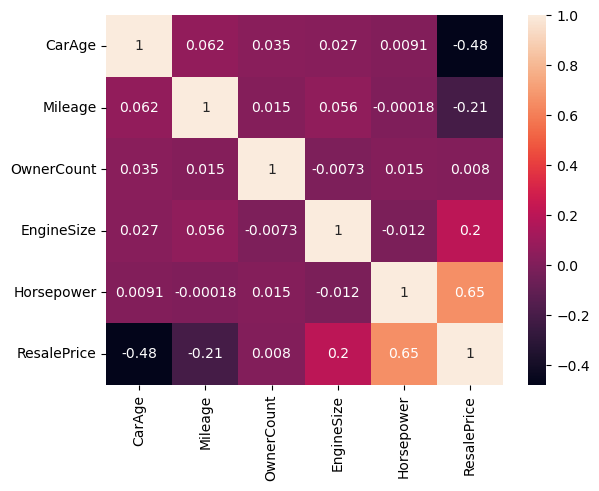

In [10]:
sns.heatmap(data[num_col].corr(), annot = True)

<Axes: >

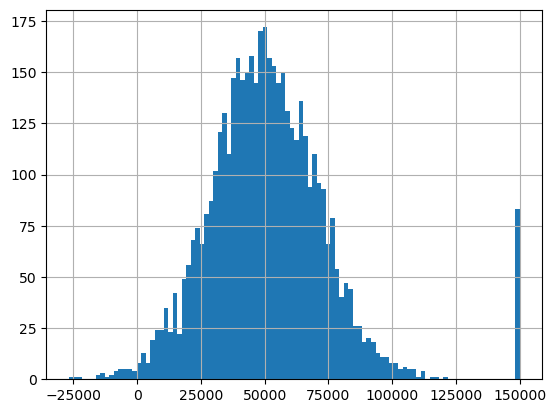

In [11]:
data['Mileage'].hist(bins = 100)

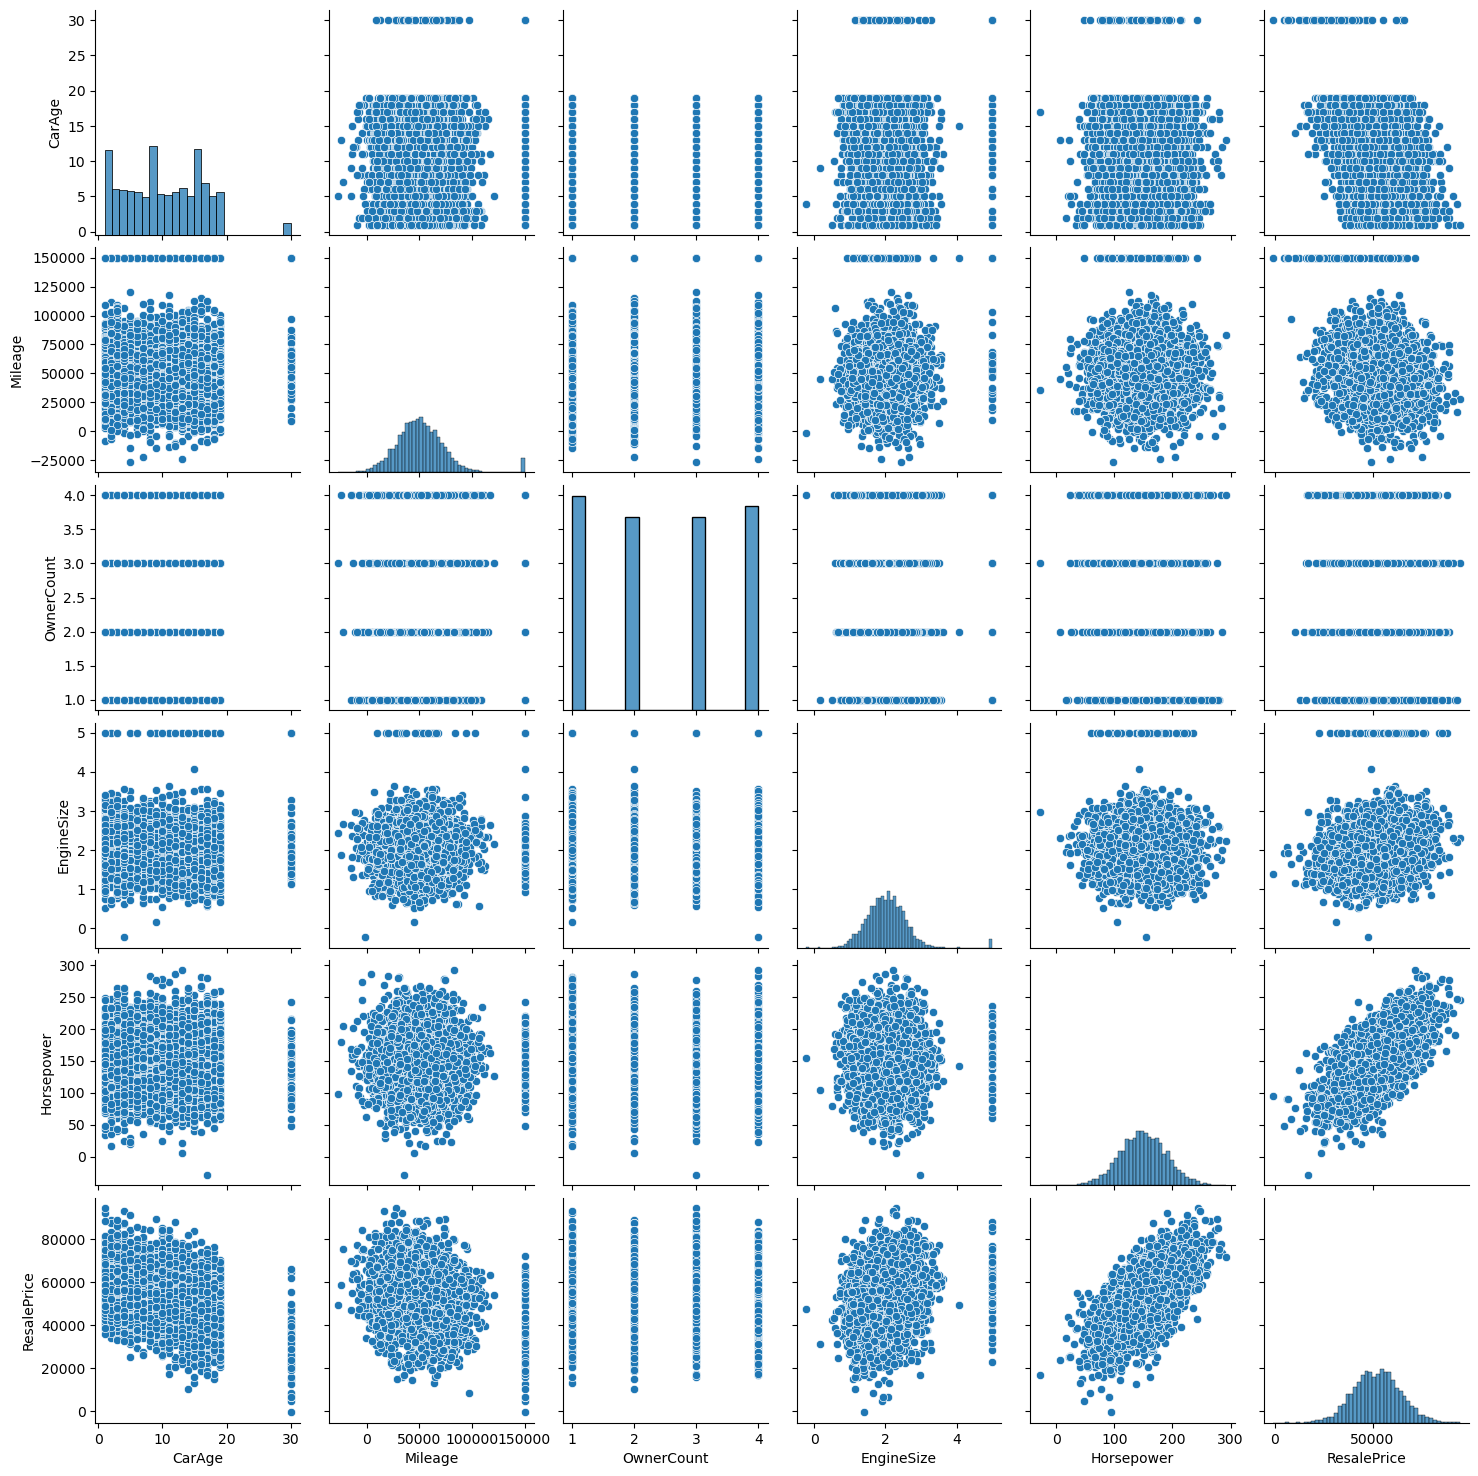

In [12]:
#Bivariate
sns.pairplot(data[num_col])

In [13]:
data['Mileage'].value_counts()

Mileage
150000.00    83
42138.20      1
61365.47      1
67196.67      1
84891.68      1
             ..
64187.05      1
50389.17      1
47229.76      1
41522.20      1
56126.95      1
Name: count, Length: 4584, dtype: int64

In [15]:
data.groupby(['Mileage','EngineSize','Horsepower']).ResalePrice.mean().to_csv('result_car.csv')

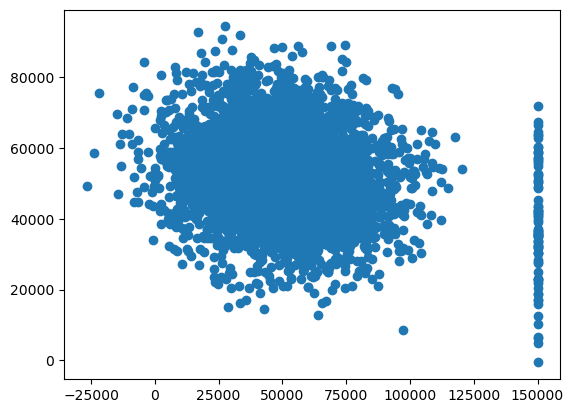

In [16]:
plt.scatter(data['Mileage'], data['ResalePrice'])
plt.savefig('Mileage_price_scatter.png')

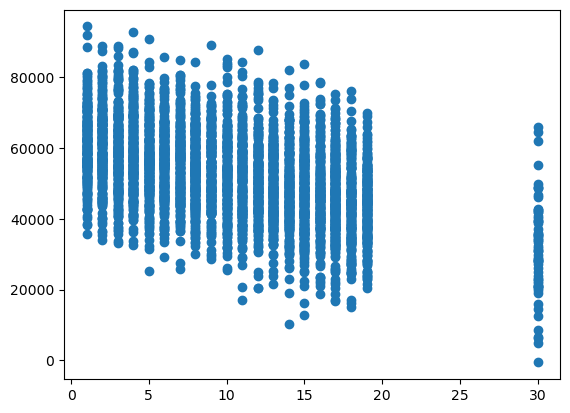

In [17]:
plt.scatter(data['CarAge'], data['ResalePrice'])
plt.savefig('CarAge_price_scatter.png')

In [18]:
data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [19]:
data['OwnerCount'].mode()[0]

1.0

In [20]:
data['OwnerCount'].fillna(data['OwnerCount'].mode()[0], inplace = True)

In [21]:
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,Poor,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,Fair,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,Fair,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,Poor,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,Fair,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,Fair,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,Poor,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,Excellent,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,Excellent,64847.89


In [22]:
data.isna().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [23]:
num_col = data.select_dtypes(include = 'number').columns

In [24]:
data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.00,0.06,-0.03,0.03,0.01,-0.48
Mileage,0.06,1.00,-0.00,0.06,-0.00,-0.21
OwnerCount,-0.03,-0.00,1.00,-0.02,0.02,0.04
EngineSize,0.03,0.06,-0.02,1.00,-0.01,0.20
Horsepower,0.01,-0.00,0.02,-0.01,1.00,0.65
ResalePrice,-0.48,-0.21,0.04,0.20,0.65,1.00


In [25]:
data['CarCondition'].value_counts()

CarCondition
Fair         1190
Excellent    1188
Poor         1148
Good         1140
Name: count, dtype: int64

In [26]:
mapping = {'Excellent':1, 'Good':2, 'Fair':3, 'Poor':4}

In [27]:
data['CarCondition'] = data['CarCondition'].map(mapping)

In [28]:
data

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,4,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,3,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,3,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,4,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,3,57287.51
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,Audi,Hybrid,Manual,2.00,1.84,170.18,3,56808.96
4662,4,66193.15,Hyundai,Diesel,Automatic,4.00,1.84,162.18,4,56224.63
4663,1,54614.23,Ford,Electric,Automatic,2.00,2.48,178.08,1,68440.02
4664,7,52035.77,Toyota,Hybrid,Manual,4.00,1.63,191.21,1,64847.89


In [29]:
data.head()

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.73,Honda,Electric,Manual,3.00,1.86,116.78,4,37380.23
1,11,72118.01,Honda,Electric,Automatic,4.00,2.46,150.06,3,58279.18
2,8,38721.05,Ford,Hybrid,Manual,2.00,1.67,140.58,3,52420.52
3,7,33675.66,Kia,Petrol,Automatic,3.00,2.80,157.02,4,54195.80
4,19,51562.86,Mercedes,Petrol,Automatic,4.00,2.42,196.91,3,57287.51


In [31]:
data[['Brand','FuelType','Transmission']].value_counts()

Brand     FuelType  Transmission
BMW       Electric  Manual          83
Nissan    Diesel    Manual          79
Toyota    Diesel    Manual          79
Audi      Hybrid    Automatic       77
Ford      Diesel    Manual          76
                                    ..
Mercedes  Petrol    Manual          53
Hyundai   Petrol    Automatic       51
Nissan    Electric  Manual          51
          Hybrid    Automatic       50
          Electric  Automatic       46
Name: count, Length: 72, dtype: int64

In [32]:
#OneHot Encoding

data = pd.get_dummies(data, columns=['Brand','FuelType','Transmission'],dtype='int' )

In [33]:
data

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Automatic,Transmission_Manual
0,15,70539.73,3.00,1.86,116.78,4,37380.23,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,11,72118.01,4.00,2.46,150.06,3,58279.18,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,8,38721.05,2.00,1.67,140.58,3,52420.52,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7,33675.66,3.00,2.80,157.02,4,54195.80,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,19,51562.86,4.00,2.42,196.91,3,57287.51,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.58,2.00,1.84,170.18,3,56808.96,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4662,4,66193.15,4.00,1.84,162.18,4,56224.63,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4663,1,54614.23,2.00,2.48,178.08,1,68440.02,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4664,7,52035.77,4.00,1.63,191.21,1,64847.89,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [34]:
scaling = StandardScaler()

In [35]:
X = data.drop(columns='ResalePrice')

In [36]:
X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [37]:
scaled_features = X.columns

In [38]:
data[scaled_features] = scaling.fit_transform(data[scaled_features])

In [39]:
data

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Automatic,Transmission_Manual
0,0.80,0.79,0.49,-0.31,-0.83,1.35,37380.23,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,-0.60,1.75,-0.58,-0.56,-0.99,0.99
1,0.12,0.86,1.36,0.74,0.01,0.45,58279.18,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,-0.60,1.75,-0.58,-0.56,1.01,-1.01
2,-0.38,-0.53,-0.38,-0.64,-0.23,0.45,52420.52,-0.35,-0.36,2.76,...,-0.35,-0.35,-0.34,-0.36,-0.60,-0.57,1.72,-0.56,-0.99,0.99
3,-0.55,-0.73,0.49,1.32,0.18,1.35,54195.80,-0.35,-0.36,-0.36,...,2.82,-0.35,-0.34,-0.36,-0.60,-0.57,-0.58,1.78,1.01,-1.01
4,1.47,0.01,1.36,0.67,1.18,0.45,57287.51,-0.35,-0.36,-0.36,...,-0.35,2.83,-0.34,-0.36,-0.60,-0.57,-0.58,1.78,1.01,-1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,-1.06,-1.19,-0.38,-0.34,0.51,0.45,56808.96,2.84,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,-0.60,-0.57,1.72,-0.56,-0.99,0.99
4662,-1.06,0.61,1.36,-0.35,0.31,1.35,56224.63,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,-0.36,1.68,-0.57,-0.58,-0.56,1.01,-1.01
4663,-1.56,0.13,-0.38,0.76,0.71,-1.33,68440.02,-0.35,-0.36,2.76,...,-0.35,-0.35,-0.34,-0.36,-0.60,1.75,-0.58,-0.56,1.01,-1.01
4664,-0.55,0.03,1.36,-0.71,1.03,-1.33,64847.89,-0.35,-0.36,-0.36,...,-0.35,-0.35,-0.34,2.80,-0.60,-0.57,1.72,-0.56,-0.99,0.99


In [40]:
data.corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,...,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol,Transmission_Automatic,Transmission_Manual
CarAge,1.00,0.06,-0.03,0.03,0.01,-0.03,-0.48,-0.01,-0.02,0.01,...,-0.01,-0.01,0.01,0.01,0.00,-0.02,0.01,0.01,0.00,-0.00
Mileage,0.06,1.00,-0.00,0.06,-0.00,-0.01,-0.21,-0.01,-0.01,0.01,...,-0.01,0.00,-0.01,0.00,-0.02,0.02,-0.02,0.01,-0.00,0.00
OwnerCount,-0.03,-0.00,1.00,-0.02,0.02,-0.03,0.04,0.01,0.00,-0.01,...,-0.02,0.01,0.01,-0.01,-0.02,0.00,0.01,0.01,0.01,-0.01
EngineSize,0.03,0.06,-0.02,1.00,-0.01,-0.02,0.20,0.02,-0.01,-0.01,...,0.02,0.01,0.02,-0.01,0.00,0.01,-0.00,-0.01,0.01,-0.01
Horsepower,0.01,-0.00,0.02,-0.01,1.00,-0.01,0.65,0.01,0.01,0.01,...,0.00,-0.01,-0.02,-0.01,-0.00,-0.01,-0.00,0.01,-0.00,0.00
CarCondition,-0.03,-0.01,-0.03,-0.02,-0.01,1.00,-0.12,-0.02,0.02,0.01,...,0.00,-0.00,0.01,0.00,0.02,-0.02,0.01,-0.01,-0.01,0.01
ResalePrice,-0.48,-0.21,0.04,0.20,0.65,-0.12,1.00,0.02,0.02,-0.00,...,0.02,-0.01,-0.01,-0.02,0.01,0.00,-0.00,-0.01,0.01,-0.01
Brand_Audi,-0.01,-0.01,0.01,0.02,0.01,-0.02,0.02,1.00,-0.13,-0.13,...,-0.12,-0.12,-0.12,-0.13,-0.02,-0.01,0.02,0.00,-0.00,0.00
Brand_BMW,-0.02,-0.01,0.00,-0.01,0.01,0.02,0.02,-0.13,1.00,-0.13,...,-0.13,-0.13,-0.12,-0.13,-0.01,0.02,-0.01,-0.00,0.01,-0.01
Brand_Ford,0.01,0.01,-0.01,-0.01,0.01,0.01,-0.00,-0.13,-0.13,1.00,...,-0.13,-0.13,-0.12,-0.13,0.01,-0.01,0.01,-0.01,-0.00,0.00


In [41]:
X = data.drop(columns = 'ResalePrice')
y = data['ResalePrice']

In [42]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=31)

In [43]:
model = LinearRegression()

In [44]:
model.fit(train_X, train_y)

LinearRegression()

In [45]:
model.coef_

array([-5.82409554e+03, -2.38049451e+03,  1.93443935e+02,  2.81055717e+03,
        7.96323992e+03, -1.66378173e+03, -1.11187122e+17, -1.12593898e+17,
       -1.13607172e+17, -1.10232730e+17, -1.11941051e+17, -1.11941051e+17,
       -1.11659313e+17, -1.08775459e+17, -1.12408015e+17,  7.97642995e+16,
        7.81123585e+16,  7.87902512e+16,  7.75767471e+16,  2.46604391e+16,
        2.46604391e+16])

<Axes: >

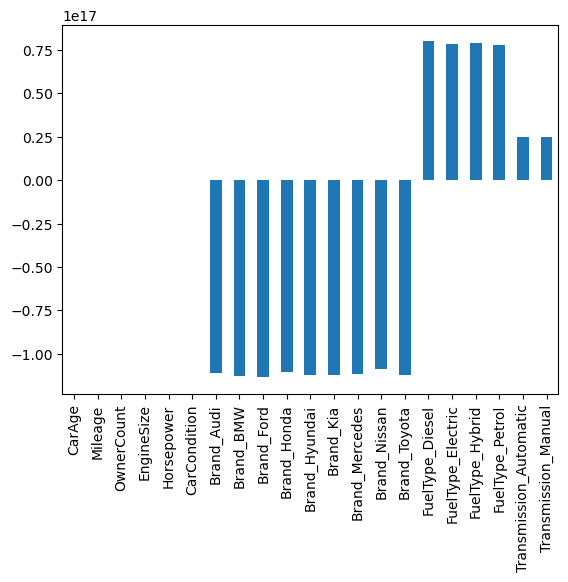

In [46]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [47]:
model.intercept_

52167.13396955593

In [48]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [49]:
def evaluate(actual, pred, source):
    print(source)
    print("MSE")
    print(mean_squared_error(actual, pred))
    print("RMSE")
    print(np.sqrt(mean_squared_error(actual, pred)))
    print("MAPE")
    print(mean_absolute_percentage_error(actual, pred)) 
    print("R2 score")
    print(r2_score(actual, pred)) 
    return [mean_squared_error(actual, pred), np.sqrt(mean_squared_error(actual, pred)), r2_score(actual, pred), mean_absolute_percentage_error(actual, pred)]

In [50]:
train_result = evaluate(train_y, train_pred, 'TRAIN DATA RESULT')
test_result = evaluate(test_y, test_pred, 'TEST DATA RESULT')

TRAIN DATA RESULT
MSE
33970638.480312586
RMSE
5828.433621506947
MAPE
0.09986890109566594
R2 score
0.7701363474105654
TEST DATA RESULT
MSE
34675435.671599664
RMSE
5888.585201183699
MAPE
0.09555040445983987
R2 score
0.7579636647489415


In [51]:
train_result

[33970638.480312586,
 5828.433621506947,
 0.7701363474105654,
 0.09986890109566594]

In [52]:
test_result

[34675435.671599664,
 5888.585201183699,
 0.7579636647489415,
 0.09555040445983987]

In [53]:
res = [train_result] + [test_result]

In [54]:
res

[[33970638.480312586,
  5828.433621506947,
  0.7701363474105654,
  0.09986890109566594],
 [34675435.671599664,
  5888.585201183699,
  0.7579636647489415,
  0.09555040445983987]]

In [56]:
pd.DataFrame(res, columns=['MSE','RMSE','R2 Score','MAPE'], index = ['Train', 'Test'])

,MSE,RMSE,R2 Score,MAPE
Train,33970638.48,5828.43,0.77,0.10
Test,34675435.67,5888.59,0.76,0.10
